# Sklearn

## sklearn.neighbors

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, neighbors 
import sklearn.model_selection as ms

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

NameError: name 'datasets' is not defined

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

NameError: name 'ListedColormap' is not defined

In [1]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

NameError: name 'pylab' is not defined

In [6]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель KNeighborsClassifier

In [7]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.90000000000000002

In [9]:
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 1, 1, 2, 0])

### Разделяющая поверхность

In [10]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [11]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

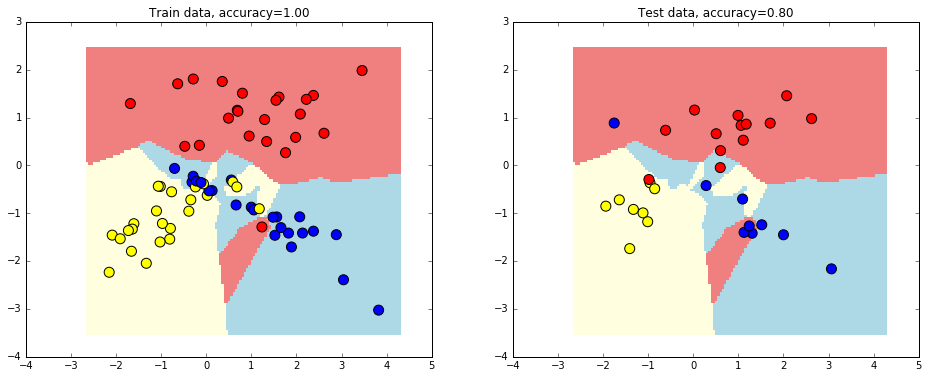

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

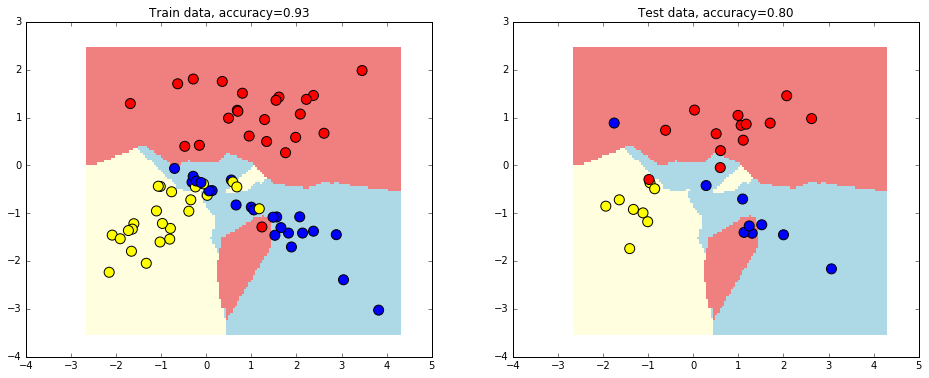

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

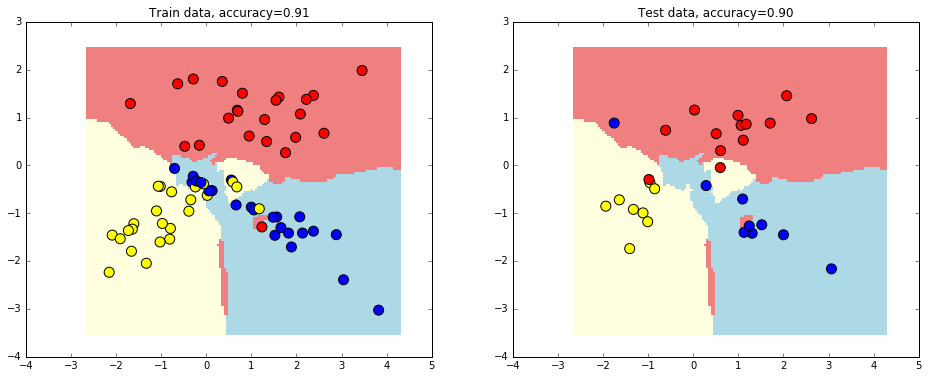

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

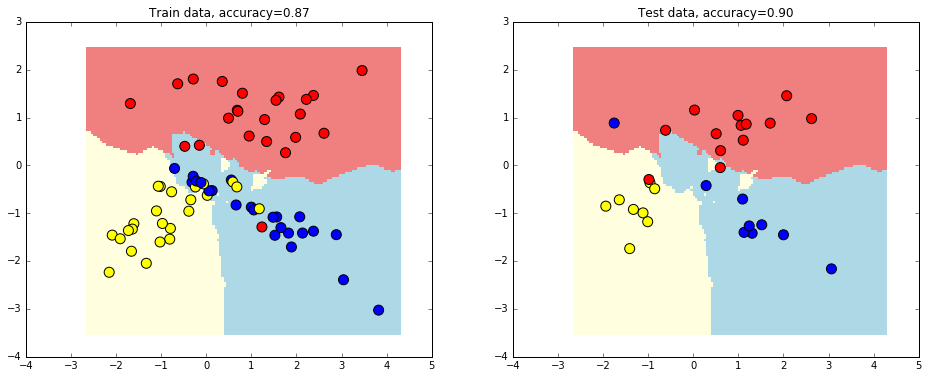

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

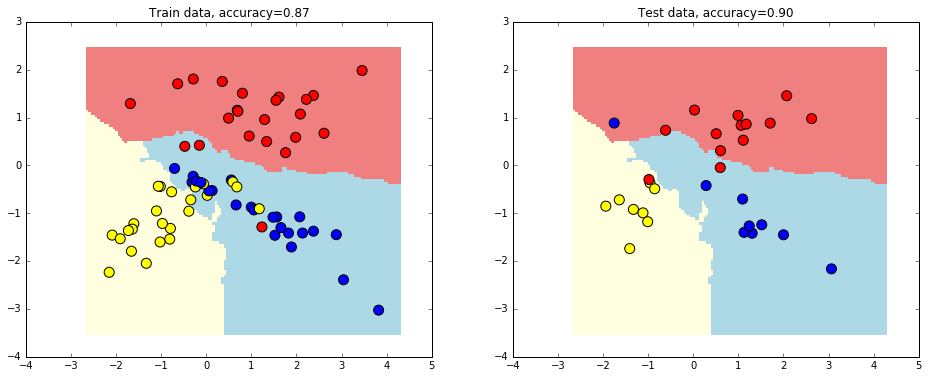

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

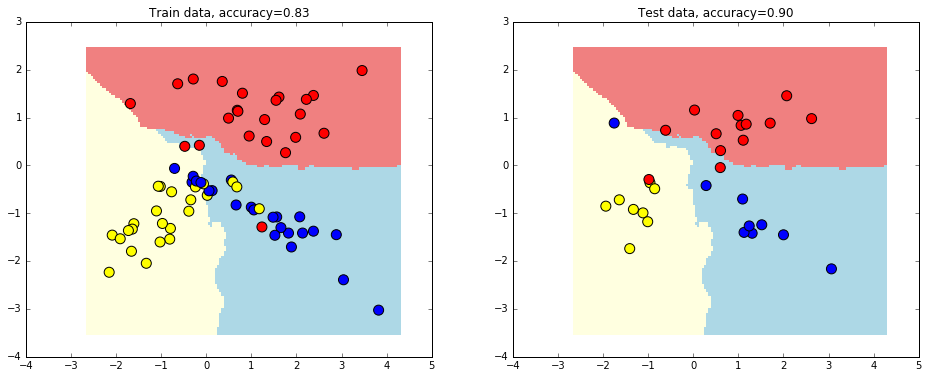

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

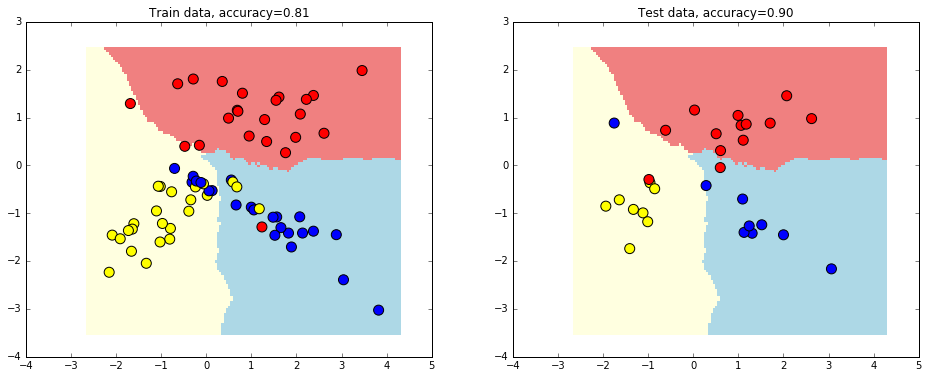

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

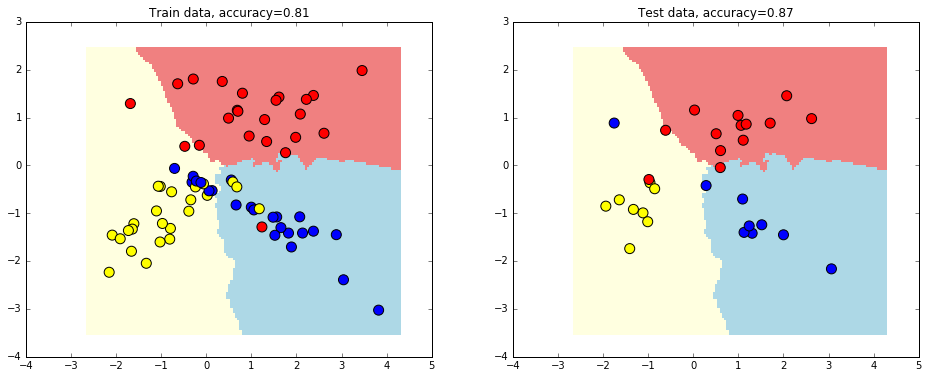

In [19]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Построим график для test_size = $0.3$ ($70\%$ от выборки -- обучающая, $30\%$ -- тестовая)

In [20]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [21]:
accuracy_scores_train = []
accuracy_scores_test = []

for k in np.arange(1, len(train_data), 1):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    estimator.fit(train_data, train_labels)
    if (k < len(train_labels)):
        accuracy_scores_train.append(metrics.accuracy_score(train_labels, estimator.predict(train_data)))
        accuracy_scores_test.append(metrics.accuracy_score(test_labels, estimator.predict(test_data)))

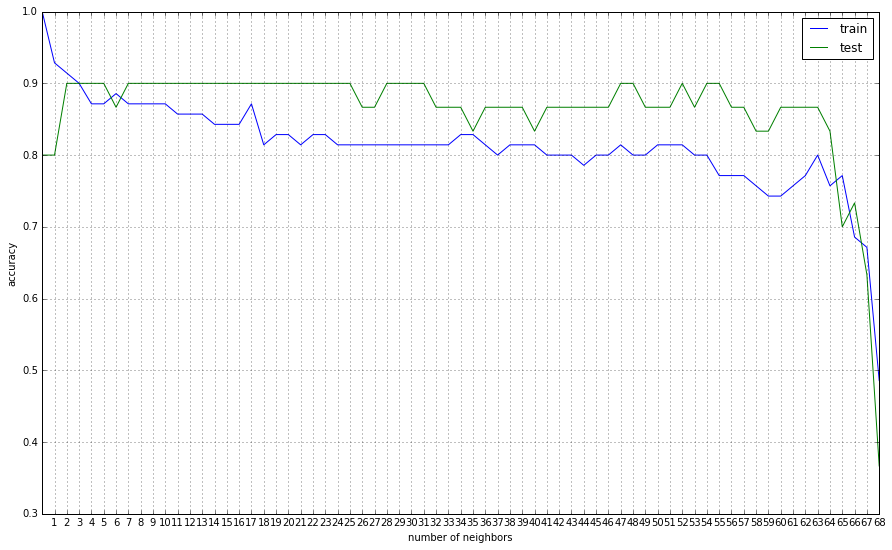

In [22]:
plt.figure(figsize=(15,9))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.xticks(np.arange(1, len(accuracy_scores_train), 1))
plt.plot(np.arange(len(accuracy_scores_train)), accuracy_scores_train, label='train')
plt.plot(np.arange(len(accuracy_scores_test)), accuracy_scores_test, label='test')
plt.legend(loc='best')

Очевидно, что при количестве соседей $k=1$ мы всегда имеем $100\%$ точность на тренировочной выборке, однако это не гарантирует нам высокий успех предсказаний. При больших $k$ мы всегда получим низкую точность (данные все больше начинают 'замыливаться' -- точность падает)

На данном тесте оптимальное значение количества соседей:

Поскольку точность при $k=1$ и при больших $k$ низкая, то точность в какой-то момент достигает своего пика.

In [23]:
k_opt = np.argmax(accuracy_scores_test)
print(k_opt)

2


In [24]:
ticks = np.arange(5, 100, 2.5)

def draw_accuracy_by_cross_validation_part(n):
    accuracy_scores_train = []
    accuracy_scores_test = []
    for k in ticks:
        train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                         classification_problem[1], 
                                                                                         test_size = k/100.0,
                                                                                         random_state = 1)
        estimator = neighbors.KNeighborsClassifier(n_neighbors=min(train_data.shape[0] - 1, n))
        estimator.fit(train_data, train_labels)
        accuracy_scores_train.append(metrics.accuracy_score(train_labels, estimator.predict(train_data)))
        accuracy_scores_test.append(metrics.accuracy_score(test_labels, estimator.predict(test_data)))



    plt.figure(figsize=(15,9))
    plt.title('Number of neighbors = ' + str(n))
    plt.xlabel('test size (%)')
    plt.ylabel('accuracy')
    plt.grid()
    plt.xticks(range(0, 101, 20) + [ticks[np.argmax(accuracy_scores_test)]])
    plt.axvline(ticks[np.argmax(accuracy_scores_test)], color='red')
    plt.plot(ticks, accuracy_scores_train, label='train')
    plt.plot(ticks, accuracy_scores_test, label='test')
    plt.scatter(ticks[np.argmax(accuracy_scores_test)], np.max(accuracy_scores_test), s=50, color='red', label='maximum accuracy')
    plt.legend(loc='best')

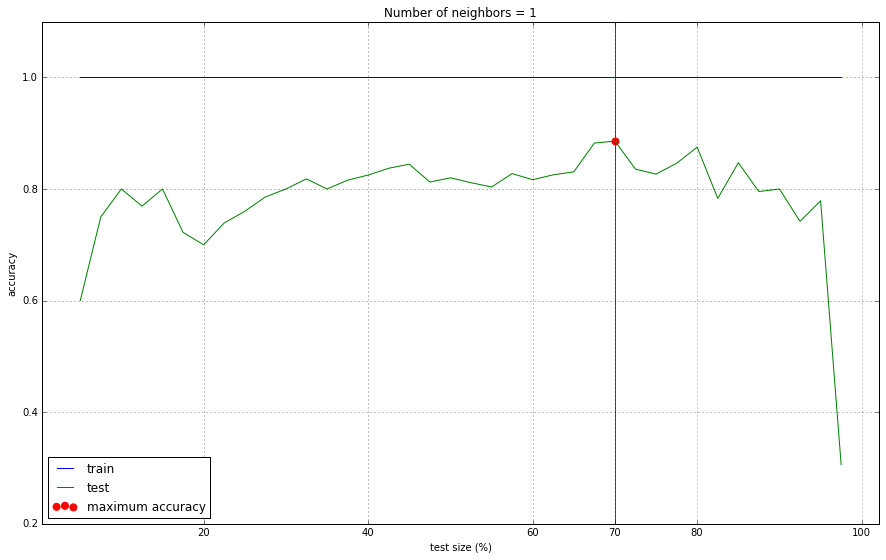

In [25]:
draw_accuracy_by_cross_validation_part(1)

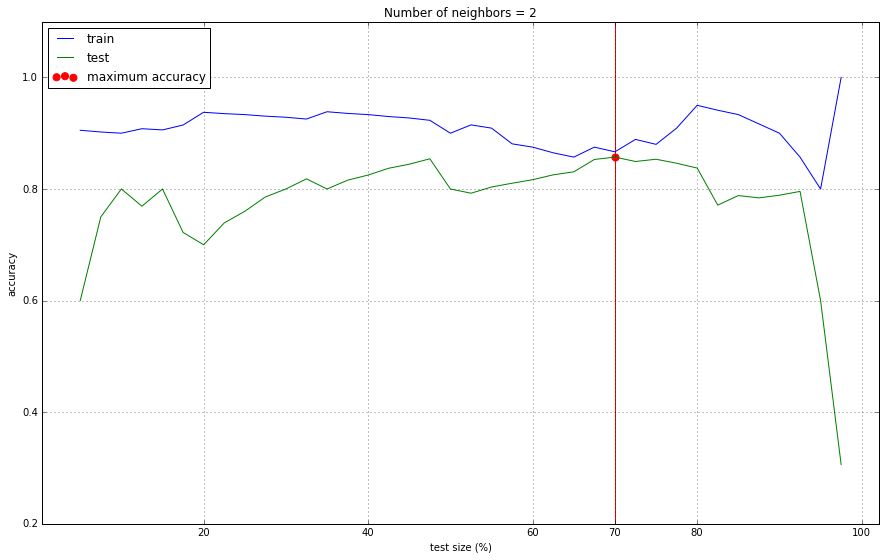

In [26]:
draw_accuracy_by_cross_validation_part(2)

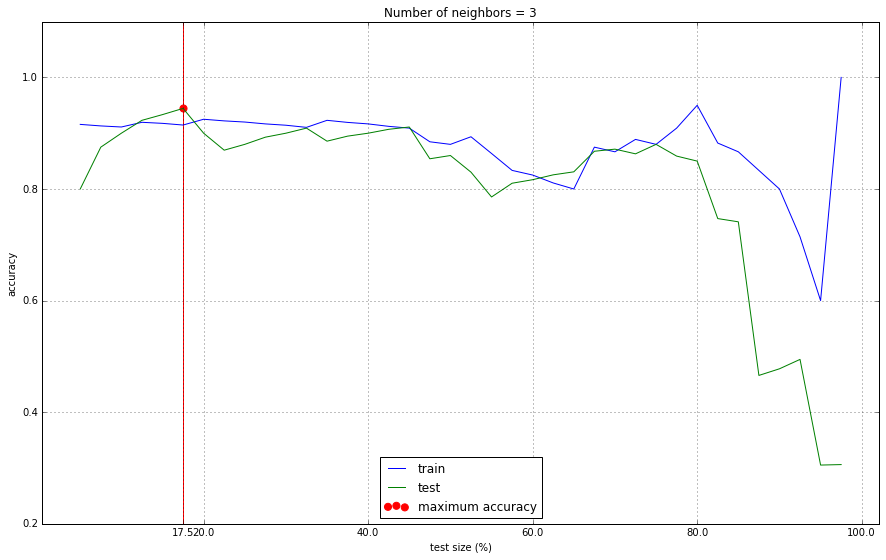

In [27]:
draw_accuracy_by_cross_validation_part(3)

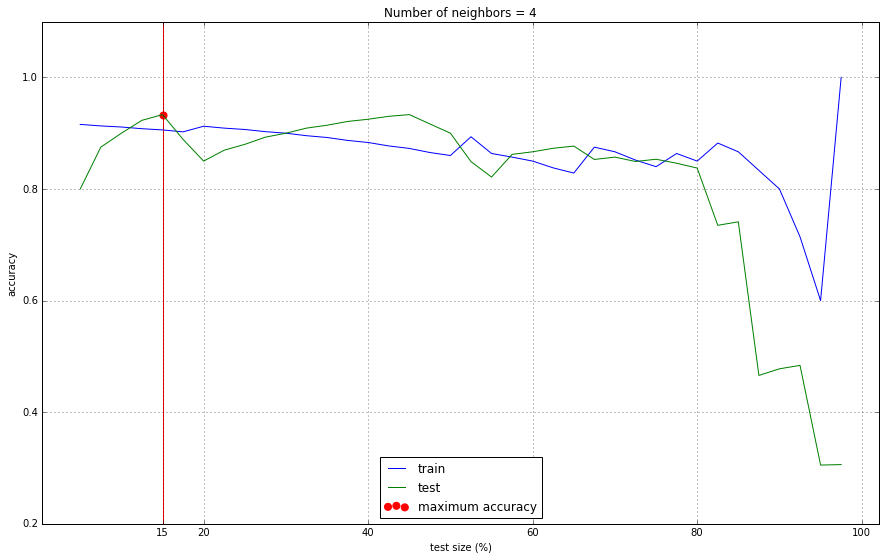

In [28]:
draw_accuracy_by_cross_validation_part(4)

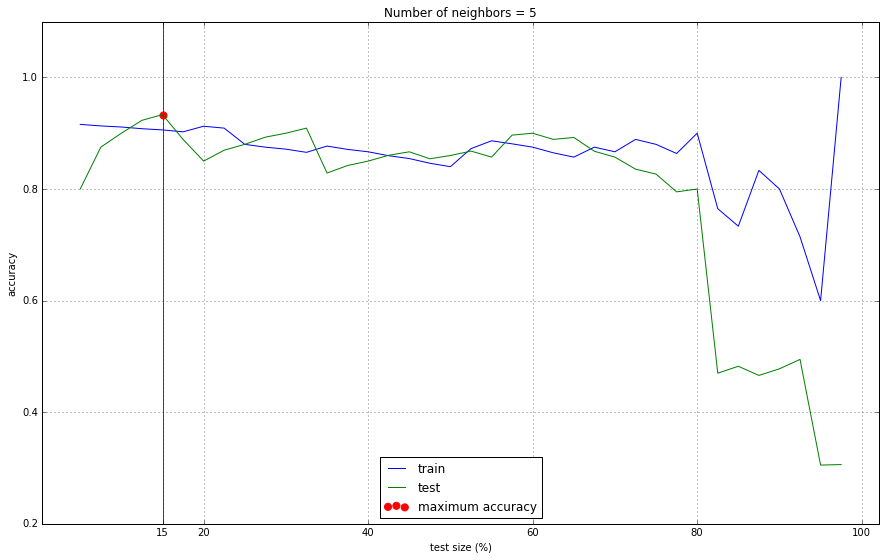

In [29]:
draw_accuracy_by_cross_validation_part(5)

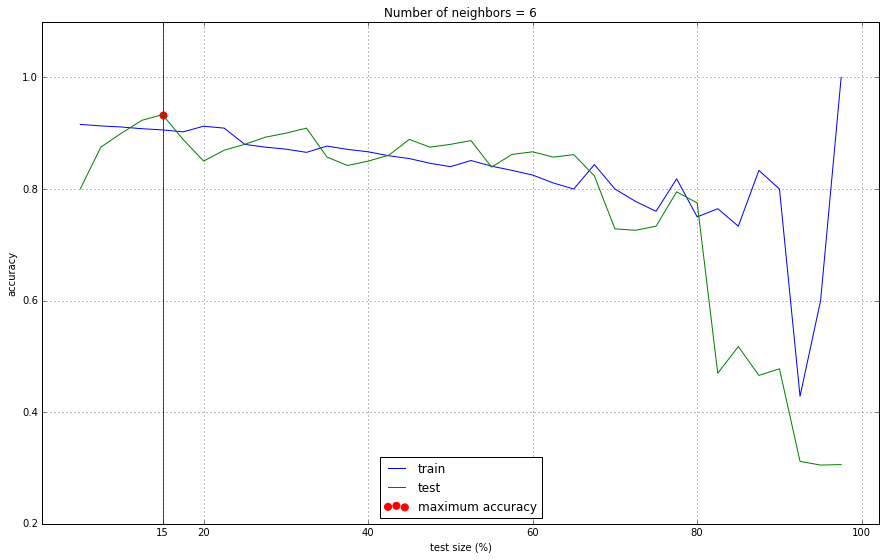

In [30]:
draw_accuracy_by_cross_validation_part(6)

Наконец, построим график $\max(accuracy)$ от количества соседей $n$

In [31]:
ticks = np.arange(5, 100, 1)
best_accuracies = []
ns = np.arange(1, 50, 1)
for n in ns:
    accuracy_scores_train = []
    accuracy_scores_test = []
    for k in ticks:
        train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                         classification_problem[1], 
                                                                                         test_size = k/100.0,
                                                                                         random_state = 1)
        if (n < train_data.shape[0]):
            estimator = neighbors.KNeighborsClassifier(n_neighbors=n)
            estimator.fit(train_data, train_labels)
            accuracy_scores_train.append(metrics.accuracy_score(train_labels, estimator.predict(train_data)))
            accuracy_scores_test.append(metrics.accuracy_score(test_labels, estimator.predict(test_data)))
    best = (np.max(accuracy_scores_test), ticks[np.argmax(accuracy_scores_test)])
    best_accuracies.append(best)


In [32]:
best_accuracies = np.array(best_accuracies)

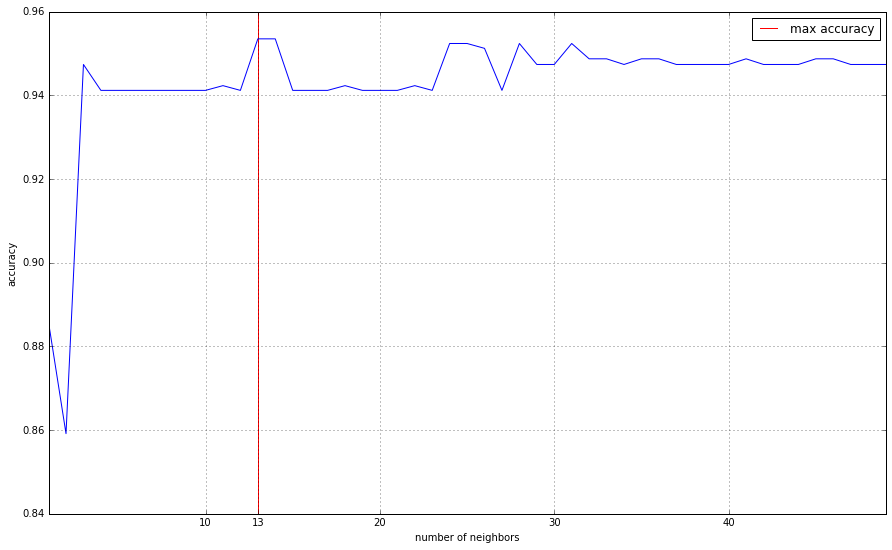

In [35]:
plt.figure(figsize=(15,9))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.xticks(range(0, 50, 10) + [ns[np.argmax(accuracies)]])
plt.axvline(ns[np.argmax(accuracies)], color='red', label='max accuracy')
plt.grid()
plt.legend(loc='best')

plt.plot(ns, best_accuracies[:, :1])

Ради интереса посмотрим на этот 'лучший' результат:

In [34]:
accuracies = best_accuracies[:, :1]
percent = best_accuracies[:, 1:]
best_number_of_neighbors = ns[np.argmax(accuracies)]
best_percent_test = percent[np.argmax(accuracies)]

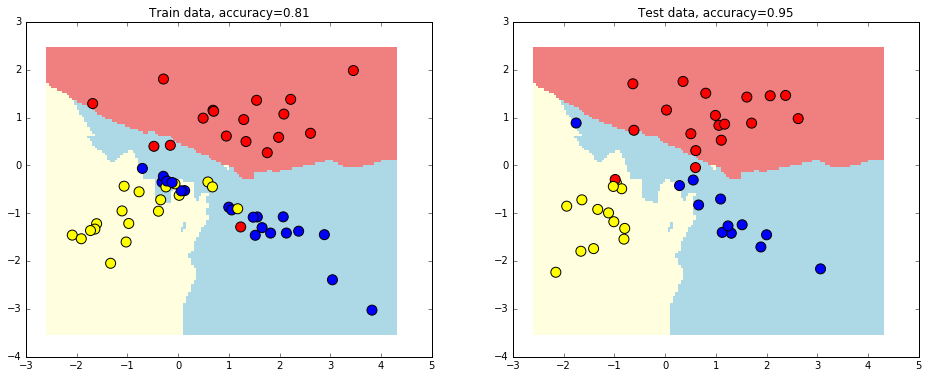

In [36]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = best_percent_test/100.0,
                                                                                     random_state = 1)
estimator = neighbors.KNeighborsClassifier(n_neighbors=best_number_of_neighbors)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Выглядит красиво, впечатляет точность на тестовой выборке. Однако, в действительности, мы слишком сильно 'подгоняли' размеры выборок под тестирующую метрику.

Действительно, поменяем random_state у train_test_split:

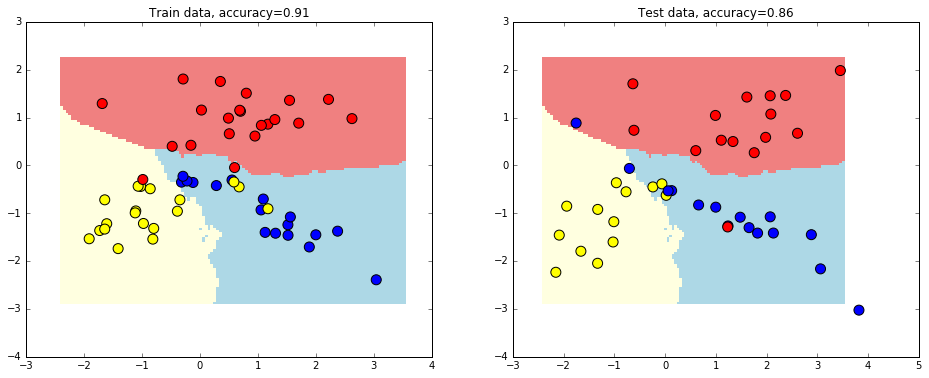

In [37]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = best_percent_test/100.0,
                                                                                     random_state = 0)
estimator = neighbors.KNeighborsClassifier(n_neighbors=best_number_of_neighbors)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

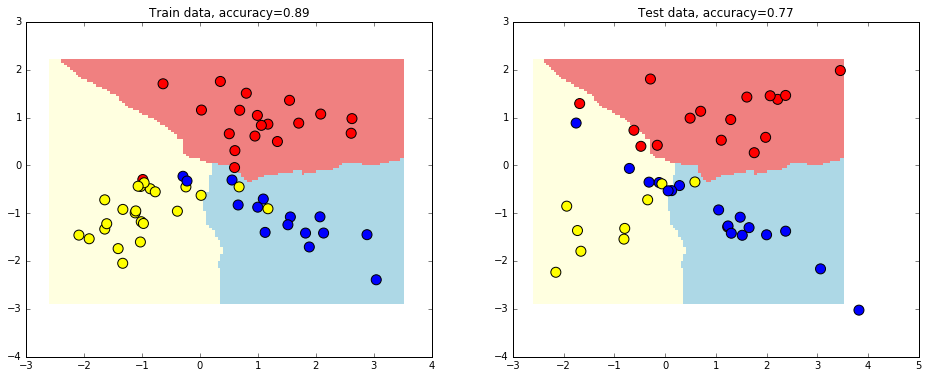

In [38]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = best_percent_test/100.0,
                                                                                     random_state = 41)
estimator = neighbors.KNeighborsClassifier(n_neighbors=best_number_of_neighbors)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Всё отлично, только ещё нужно было model_selection.cross_val_score (именно это имелось в виду под качеством на кроссвалидации)

In [30]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 41)
estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
ms.cross_val_score(estimator, classification_problem[0], classification_problem[1])

array([ 0.79411765,  0.94117647,  0.75      ])

Анализ работы кросс-валидации в зависимости от количества соседей $k$

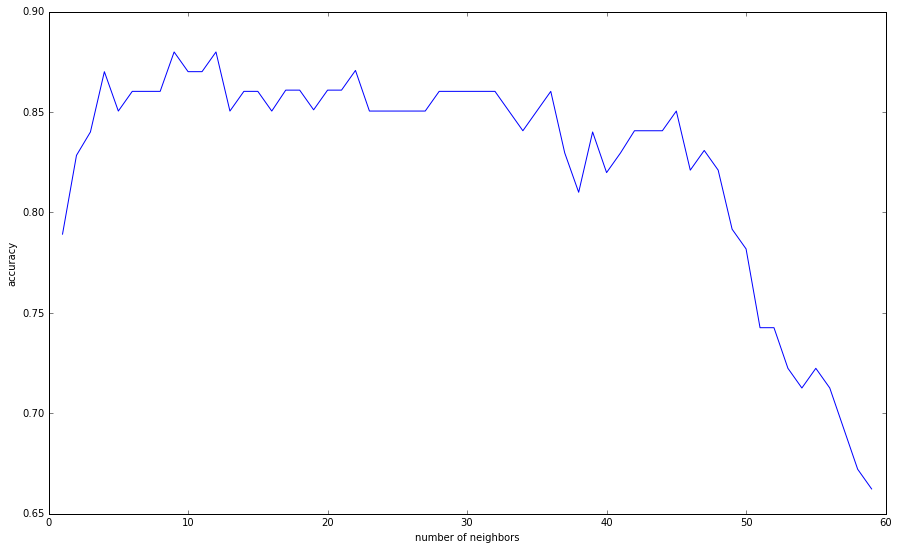

In [43]:
ks = np.arange(1, 60)
plt.figure(figsize=(15,9))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
dat = [np.average(ms.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k), classification_problem[0], classification_problem[1])) for k in ks]
plt.plot(ks, dat)

Как мы видем, при малых и очень больших $k$ точность предсказаний низкая. Максимум находится около $k=11$